In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('A2_Q4_data.csv')
X = df.X
Y = df.Y

In [16]:
def f(w,b,x):
    return 1.0 / (1.0 + np.exp(-(w*x + b)))

In [17]:
def error(w, b):
    err = 0.0
    for x,y in zip(X, Y):
        fx = f(w,b,x)
        err += 0.5 * (fx -y) ** 2
    return err

In [18]:
def grad_b(w,b,x,y):
    fx = f(w,b,x)
    return (fx -y) * fx * (1 - fx)

In [19]:
def grad_w(w,b,x,y):
    fx = f(w,b,x)
    return (fx -y) * fx * (1 - fx) * x

In [20]:
def do_gradient_descent():
    w, b, eta, max_epochs = 1, 1, 0.01, 100
    for i in range(max_epochs):
        dw, db = 0, 0
        for x,y in zip(X, Y):
            dw += grad_w(w, b, x, y)
            db += grad_b(w, b, x, y)
        w = w - eta * dw
        b = b - eta * db
        return w, b

In [21]:
w, b = do_gradient_descent()

In [22]:
w, b

(1.00202940344067, 0.9989413018777865)

In [13]:
error(w, b)

0.06187936025238457

In [23]:
def h11(x):
    return f(400, 24, x)

In [24]:
def h12(x):
    return f(400, -24, x)

In [25]:
def h21(x):
    return h11(x) - h12(x)

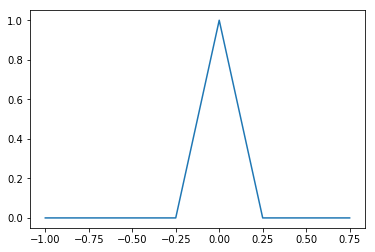

In [26]:
x = np.arange(-1, 1, 0.25)
y = h21(x)
# Plot the data
plt.plot(x, y)

In [27]:
def h(w1, w2, x1, x2, b):
    return 1.0 / (1.0 + np.exp(-(w1*x1 + w2*x2 + b)))

In [28]:
def h11(x1, x2):
    return h(1, 100, x1, x2, 200)

In [29]:
def h12(x1, x2):
    return h(1, 100, x1, x2, -200)

In [30]:
def h13(x1, x2):
    return h(100, 1, x1, x2, 200)

In [31]:
def h14(x1, x2):
    return h(100, 1, x1, x2, -200)

In [32]:
def h21(x1, x2):
    return h11(x1, x2) - h12(x1, x2)

In [33]:
def h22(x1, x2):
    return h13(x1, x2) - h14(x1, x2)

In [55]:
def h31(x1, x2):
    return h21(x1, x2) - h22(x1, x2)

In [65]:
def f(x1, x2):
    return 1.0 / (1.0 + np.exp(-(50*h31(x1, x2) -100)))

In [66]:
from mpl_toolkits.mplot3d import Axes3D

In [79]:
x1 = np.arange(-5, 5, 0.1)
x2 = np.arange(-5, 5, 0.1)
x1, x2 = np.meshgrid(x1, x2)

In [80]:
h11 = 1/(1 + np.exp(-x1 - 100*x2 - 200))

Text(0.5,0,'X2')

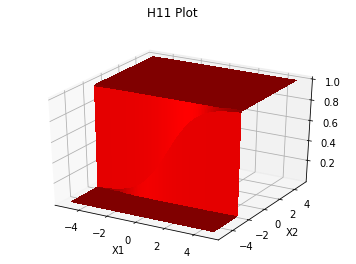

In [81]:
fig = plt.figure()
plt.suptitle('H11 Plot')
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(x1, x2, h11 , rstride = 1, cstride = 1, color = 'r', antialiased = False)
plt.xlabel('X1')
plt.ylabel('X2')